1. Volatility Targeting

This approach targets a specified level of volatility (variability) in trading capital. Since we cannot predict returns with high accuracy, we instead focus on controlling the degree to which our capital varies through position sizing. Our wealth, modeled as a Brownian motion (randomness), gains quadratic variation per unit time - meaning volatility scales as a square root of time.

With approximately 253 trading days per year, volatility computed at y% with daily returns has annualized volatility estimate of √253 * y%. Consider targeting portfolio return variability of 20% per year. We compute the desired vol at the daily level by doing 20%/√253 and aim to scale our positions such that the standard deviation of our daily returns match this target.

We begin with the assumption that we know beforehand the amount of risk we are willing to consume - the standard deviation of returns, or equivalently, volatility. For our backtest, we assume that we want to consume 20% of annualized target volatility.

This is accomplished by monitoring how much we are betting, the volatility realized from our previous bets, and then adjusting our bet sizes going forward based on the target volatility in relation to the achieved volatility.

We track the realized volatility of portfolio returns using an exponentially weighted moving average, and implement a strategy-level scalar to make necessary sizing adjustments to achieve said return volatility and positions are scaled laterally.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter, AutoDateLocator

sns.set_theme()

%matplotlib inline

In [2]:
df = pd.read_csv('../data/strategy_scalar.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %I:%M:%S %p')

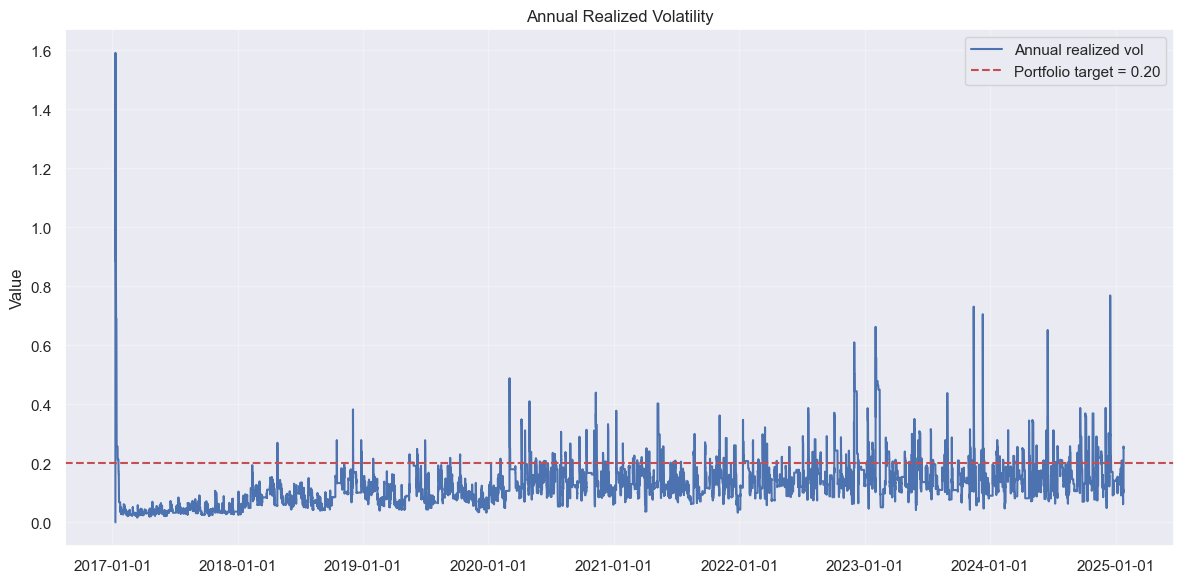

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['AnnRealizedVol'], label='Annual realized vol')
plt.axhline(y=0.20, color='r', linestyle='--', label='Portfolio target = 0.20')
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Annual Realized Volatility')
plt.ylabel('Value')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(AutoDateLocator())
plt.tight_layout()
plt.show()

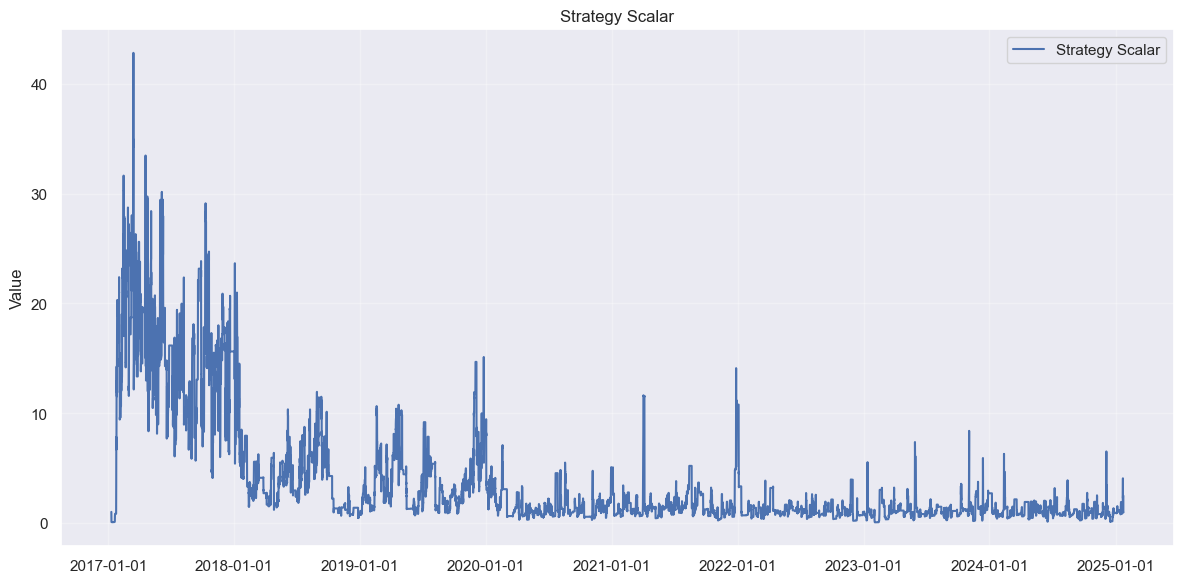

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['StratScalar'], label='Strategy Scalar')
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Strategy Scalar')
plt.ylabel('Value')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(AutoDateLocator())
plt.tight_layout()
plt.show()